## Импорт библиотек и констант 

In [32]:

# Основные библиотеки для работы с данными 
import pandas as pd
import numpy as np
import os
import json
import joblib

# Библиотеки для визуализации 
import matplotlib.pyplot as plt
import seaborn as sns

# Утилиты, метрики и модели из Scikit-learn 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance

#  Модели, которые мы будем сравнивать 
from sklearn.dummy import DummyClassifier               # Baseline 1
from sklearn.linear_model import LogisticRegression     # Baseline 2
from sklearn.tree import DecisionTreeClassifier         # Модель 1: Дерево
from sklearn.ensemble import RandomForestClassifier     # Модель 2: Лес (Bagging)
from sklearn.ensemble import HistGradientBoostingClassifier # Модель 3: Бустинг

# Настройка констант и путей

# Используем число для воспроизводимости
RANDOM_STATE = 777

ARTIFACTS_PATH = "C:/Users/1/Desktop/Учеба/2 КУРС/ДПО_Инженерия Искусственного Интеллекта/AI_source/AI_source/homeworks/HW06/artifacts/"
FIGURES_PATH = os.path.join(ARTIFACTS_PATH, "figures/")

# Проверяем, что путь существует, чтобы избежать ошибок
if not os.path.exists(ARTIFACTS_PATH):
    print(f"!!! ОШИБКА: Путь '{ARTIFACTS_PATH}' не найден. Пожалуйста, скопируйте его еще раз.")
else:
    print(f"Библиотеки и константы готовы. Random state = {RANDOM_STATE}")
    print(f"Артефакты будут сохраняться в: {ARTIFACTS_PATH}")


Библиотеки и константы готовы. Random state = 777
Артефакты будут сохраняться в: C:/Users/1/Desktop/Учеба/2 КУРС/ДПО_Инженерия Искусственного Интеллекта/AI_source/AI_source/homeworks/HW06/artifacts/


 ## Загружаем S06-hw-dataset-02.csv и проведем быстрый исследовательский анализ (EDA - Exploratory Data Analysis), чтобы понять, с какими данными имеем дело.

 1. Первичный осмотр данных (S06-hw-dataset-02.csv) 
Первые 5 строк:
   id       f01       f02       f03        f04       f05       f06       f07  \
0   1 -0.149235 -2.826966 -0.522901  -4.198449  1.364943  0.815043 -1.195518   
1   2 -1.966180 -4.877542  0.268367  -9.607791  0.097149  1.347185 -3.872575   
2   3 -0.555964 -0.999920  0.209673 -14.119498 -1.808950 -0.006222 -4.651108   
3   4 -2.049199 -5.600713 -1.664677  -6.263893 -5.224455  0.848351  1.407210   
4   5 -0.220556  4.889479 -2.235840   6.450046  0.774389 -2.382625  2.584816   

        f08       f09  ...       f29       f30       f31       f32       f33  \
0 -1.932232  2.396353  ... -0.159323  0.448015  0.572745  0.149916  0.878392   
1 -0.395117  1.710068  ... -0.389212  1.383794  0.169876  0.043969 -0.963545   
2  0.911944 -0.289037  ... -1.383970  3.044321 -0.182864  1.425649 -8.418598   
3 -0.542080  0.119102  ... -2.713080  2.762637 -0.520796 -0.142455  1.668338   
4  4.211856 -0.317889  ... -1.302872  2.478862  1.

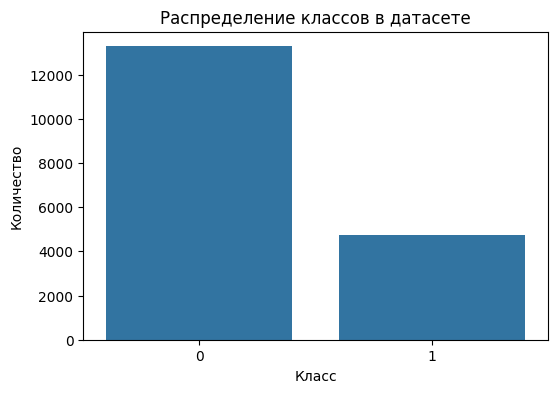


 3. Определение признаков (X) и цели (y)
Размер матрицы признаков X: (18000, 37)
Размер вектора таргета y: (18000,)


In [33]:

# Загрузка и анализ данных

# Указываем относительный путь к файлу
DATASET_PATH = 'S06-hw-dataset-02.csv'
df = pd.read_csv(DATASET_PATH)

print(f" 1. Первичный осмотр данных ({DATASET_PATH}) ")
# head() - посмотреть на первые несколько строк
print("Первые 5 строк:")
print(df.head())
print("\n" + "="*50 + "\n")

# info() - типы данных и наличие пропусков
print("Информация о типах данных и пропусках:")
df.info()
print("\n" + "="*50 + "\n")

# describe() - базовые статистики для числовых признаков
print("Статистическое описание:")
print(df.describe())
print("\n" + "="*50 + "\n")


print(" 2. Анализ целевой переменной 'target' ")
target_distribution = df['target'].value_counts(normalize=True)
print("Распределение классов (доли):")
print(target_distribution)
print("\nВывод: Наблюдается умеренный дисбаланс классов (класс '0' встречается примерно в 3 раза чаще).")

# Визуализация распределения
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Распределение классов в датасете')
plt.ylabel('Количество')
plt.xlabel('Класс')
plt.show()


print("\n 3. Определение признаков (X) и цели (y)")
# X - все столбцы, кроме id (не несет информации) и target (наша цель)
X = df.drop(columns=['id', 'target'])
# y - столбец, который мы хотим предсказывать
y = df['target']

print(f"Размер матрицы признаков X: {X.shape}")
print(f"Размер вектора таргета y: {y.shape}")



 ## Разделяем данные на обучающую и тестовую выборки. Здесь же в комментариях даем краткое пояснение, почему важны random_state и stratify.  

 ## Train/Test-сплит и воспроизводимость

### Почему важны random_state и stratify?

 random_state = 777 (или любое другое число): Гарантирует, что при каждом запуске кода# данные будут делиться на обучающую и тестовую выборки ОДИНАКОВО. Это обеспечивает
 ВОСПРОИЗВОДИМОСТЬ эксперимента, позволяя получать стабильные результаты и корректно
 сравнивать модели между собой.

   stratify = y: Сохраняет исходное процентное соотношение классов в обучающей и
    тестовой выборках. Это критически важно при несбалансированных данных, так как
    предотвращает ситуацию, когда в одну из выборок (особенно в тестовую) попадает
    непропорционально мало или много объектов редкого класса.

In [34]:

# Train/Test-сплит и воспроизводимость

# Почему важны random_state и stratify?

# random_state = 777 (или любое другое число): Гарантирует, что при каждом запуске кода
# данные будут делиться на обучающую и тестовую выборки ОДИНАКОВО. Это обеспечивает
# ВОСПРОИЗВОДИМОСТЬ эксперимента, позволяя получать стабильные результаты и корректно
# сравнивать модели между собой.
#
# stratify = y: Сохраняет исходное процентное соотношение классов в обучающей и
# тестовой выборках. Это критически важно при несбалансированных данных, так как
# предотвращает ситуацию, когда в одну из выборок (особенно в тестовую) попадает
# непропорционально мало или много объектов редкого класса.

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,            # 25% данных отправляем в тест
    random_state=RANDOM_STATE, # Фиксируем "зерно" для воспроизводимости
    stratify=y                 # Сохраняем баланс классов
)

print(f"Размер обучающей выборки (X_train): {X_train.shape}")
print(f"Размер тестовой выборки (X_test):  {X_test.shape}")
print(f"\nДоля класса '1' в y_train: {y_train.mean():.4f}")
print(f"Доля класса '1' в y_test:  {y_test.mean():.4f}")
print("Вывод: Доли классов в train и test почти идентичны. Стратификация сработала корректно.")



Размер обучающей выборки (X_train): (13500, 37)
Размер тестовой выборки (X_test):  (4500, 37)

Доля класса '1' в y_train: 0.2626
Доля класса '1' в y_test:  0.2627
Вывод: Доли классов в train и test почти идентичны. Стратификация сработала корректно.


## Создаем и обучаем две простые модели. Они станут нашей "точкой отсчета". Если сложные ансамблевые модели не смогут показать результат значительно лучше, чем эти, значит, что-то идет не так:).

In [35]:
# Baseline’ы

# Создаем словарь для хранения финальных метрик всех моделей
results = {}

# Baseline 1: DummyClassifier
# Предсказывает всегда самый частый класс (в нашем случае '0').
# Это самый "наивный" baseline. Его  точность (accuracy) равна доле самого частого класса.
print(" Обучение Baseline 1: DummyClassifier")
dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(X_train, y_train)
y_pred_dummy = dummy_model.predict(X_test)
results['DummyClassifier'] = {
    'accuracy': accuracy_score(y_test, y_pred_dummy),
    'f1': f1_score(y_test, y_pred_dummy, zero_division=0),
    'roc_auc': 0.5  # Для most_frequent AUC всегда 0.5
}
print(f"Метрики DummyClassifier: {results['DummyClassifier']}")
print("Интерпретация: Модель просто угадывает класс '0'. F1-score и ROC-AUC равны 0.5, что говорит об отсутствии предсказательной силы.")


#  Baseline 2: LogisticRegression 
# Простая, но мощная линейная модель. Обязательно используем StandardScaler, так как логистическая регрессия чувствительна к масштабу признаков.
# Pipeline объединяет масштабирование и модель в один шаг.
print("\n Обучение Baseline 2: LogisticRegression ")
pipe_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=RANDOM_STATE, max_iter=1000))
])
pipe_logreg.fit(X_train, y_train)
y_pred_logreg = pipe_logreg.predict(X_test)
y_proba_logreg = pipe_logreg.predict_proba(X_test)[:, 1]
results['LogisticRegression'] = {
    'accuracy': accuracy_score(y_test, y_pred_logreg),
    'f1': f1_score(y_test, y_pred_logreg),
    'roc_auc': roc_auc_score(y_test, y_proba_logreg)
}
print(f"Метрики LogisticRegression: {results['LogisticRegression']}")
print("Интерпретация: Логистическая регрессия уже показывает осмысленный результат, значительно превосходящий Dummy. Это наша реальная точка отсчета.")



 Обучение Baseline 1: DummyClassifier
Метрики DummyClassifier: {'accuracy': 0.7373333333333333, 'f1': 0.0, 'roc_auc': 0.5}
Интерпретация: Модель просто угадывает класс '0'. F1-score и ROC-AUC равны 0.5, что говорит об отсутствии предсказательной силы.

 Обучение Baseline 2: LogisticRegression 
Метрики LogisticRegression: {'accuracy': 0.8148888888888889, 'f1': 0.5622700998423542, 'roc_auc': 0.8064173880051281}
Интерпретация: Логистическая регрессия уже показывает осмысленный результат, значительно превосходящий Dummy. Это наша реальная точка отсчета.


## Обучение моделей с подбором гиперпараметров 

### Обучить дерево, лес и бустинг, подбирая для них оптимальные параметры с помощью GridSearchCV

In [36]:

#  Модели 6 с подбором гиперпараметров

# Словарь для хранения результатов подбора (лучшие параметры и CV-score)
search_summaries = {}

# Модель 1: DecisionTreeClassifier 
# Цель: Показать контроль сложности дерева, чтобы избежать переобучения.
print("\n 1. Обучение DecisionTreeClassifier с GridSearchCV ")
pipe_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeClassifier(random_state=RANDOM_STATE))
])
# Сетка параметров для контроля сложности:
  # max_depth - максимальная глубина дерева
  # min_samples_leaf - минимальное число объектов в листе
param_grid_dt = {
    'model__max_depth': [5, 10, 15],
    'model__min_samples_leaf': [10, 20, 50]
}
search_dt = GridSearchCV(pipe_dt, param_grid_dt, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
search_dt.fit(X_train, y_train)

# Сохраняем лучшую модель и ее результаты
best_dt = search_dt.best_estimator_
search_summaries['DecisionTreeClassifier'] = {'best_params': search_dt.best_params_, 'best_score_cv': search_dt.best_score_}
print(f"Лучшие параметры для DecisionTree: {search_dt.best_params_}")


#  Модель 2: RandomForestClassifier
# Цель: Использовать Bagging (основу Леса) для уменьшения variance (разброса) одиночного дерева.
print("\n 2. Обучение RandomForestClassifier с GridSearchCV ")
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1))
])
# Сетка "лесных" ручек:
    # n_estimators - количество деревьев в лесу
    # max_features - доля признаков, которые видит каждое дерево
param_grid_rf = {
    'model__n_estimators': [100, 200],
    'model__max_features': ['sqrt', 0.5]
}
search_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
search_rf.fit(X_train, y_train)

# Сохраняем лучшую модель и ее результаты
best_rf = search_rf.best_estimator_
search_summaries['RandomForestClassifier'] = {'best_params': search_rf.best_params_, 'best_score_cv': search_rf.best_score_}
print(f"Лучшие параметры для RandomForest: {search_rf.best_params_}")


# Модель 3: HistGradientBoostingClassifier 
# Цель: Использовать Boosting, где каждая следующая модель исправляет ошибки предыдущей.
print("\n 3. Обучение HistGradientBoostingClassifier с GridSearchCV ")
pipe_hgb = Pipeline([
    ('scaler', StandardScaler()),
    ('model', HistGradientBoostingClassifier(random_state=RANDOM_STATE))
])
# Сетка для бустинга:
# max_iter - количество "шагов" бустинга (аналог деревьев)
# learning_rate - "скорость" обучения, как сильно каждая модель исправляет ошибки
param_grid_hgb = {
    'model__max_iter': [100, 200],
    'model__learning_rate': [0.05, 0.1, 0.2]
}
search_hgb = GridSearchCV(pipe_hgb, param_grid_hgb, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
search_hgb.fit(X_train, y_train)

# Сохраняем лучшую модель и ее результаты
best_hgb = search_hgb.best_estimator_
search_summaries['HistGradientBoostingClassifier'] = {'best_params': search_hgb.best_params_, 'best_score_cv': search_hgb.best_score_}
print(f"Лучшие параметры для HistGradientBoosting: {search_hgb.best_params_}")





 1. Обучение DecisionTreeClassifier с GridSearchCV 
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Лучшие параметры для DecisionTree: {'model__max_depth': 15, 'model__min_samples_leaf': 50}

 2. Обучение RandomForestClassifier с GridSearchCV 
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Лучшие параметры для RandomForest: {'model__max_features': 'sqrt', 'model__n_estimators': 200}

 3. Обучение HistGradientBoostingClassifier с GridSearchCV 
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Лучшие параметры для HistGradientBoosting: {'model__learning_rate': 0.1, 'model__max_iter': 200}


## Оценка и диагностические графики

### Использую тестовую выборку (X_test, y_test), чтобы оценить их качество. Затем выбираю лучшую и строю для нее графики.

 Оценка моделей на тестовой выборке 

 Финальная таблица метрик на TEST 
                                accuracy        f1   roc_auc
RandomForestClassifier          0.888889  0.750250  0.935073
HistGradientBoostingClassifier  0.906889  0.807179  0.932440
DecisionTreeClassifier          0.825778  0.632615  0.833176
LogisticRegression              0.814889  0.562270  0.806417
DummyClassifier                 0.737333  0.000000  0.500000

Лучшая модель по ROC-AUC: 'RandomForestClassifier'

 Построение диагностических графиков 
График ROC-кривых сохранен.


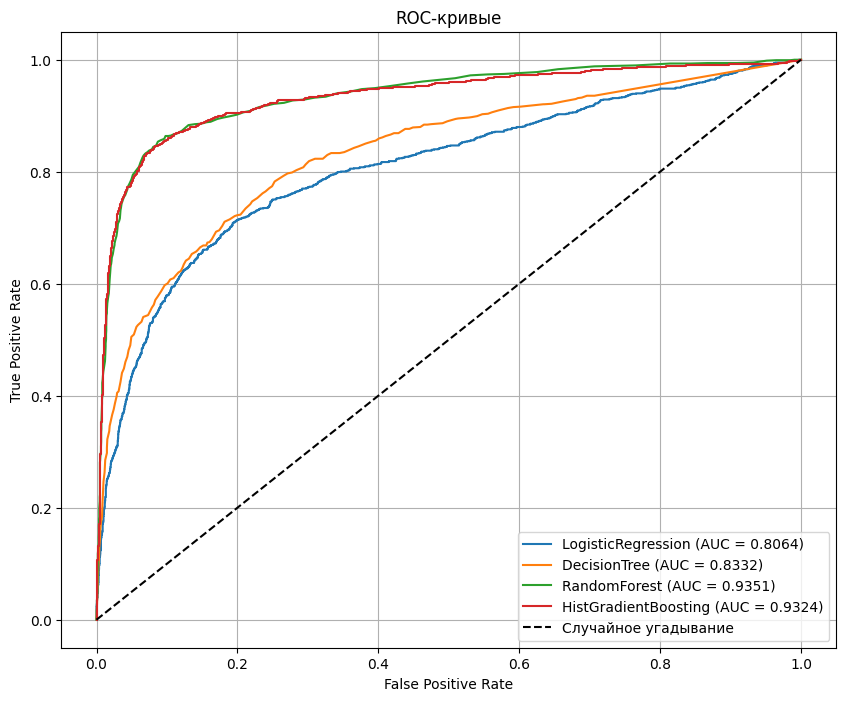

Матрица ошибок сохранена.


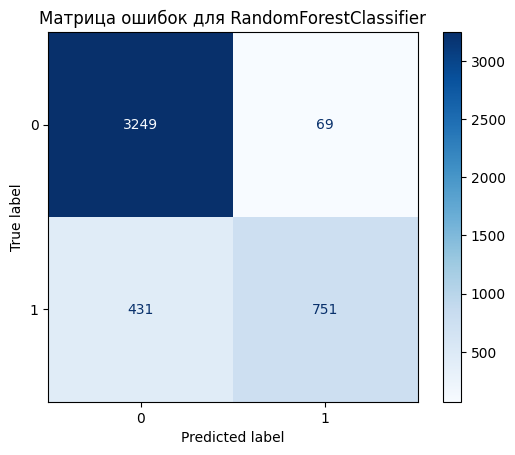


 Расчет важности признаков (Permutation Importance) 


C:\Users\1\AppData\Local\Temp\ipykernel_20248\4202167748.py:77: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


График важности признаков сохранен.


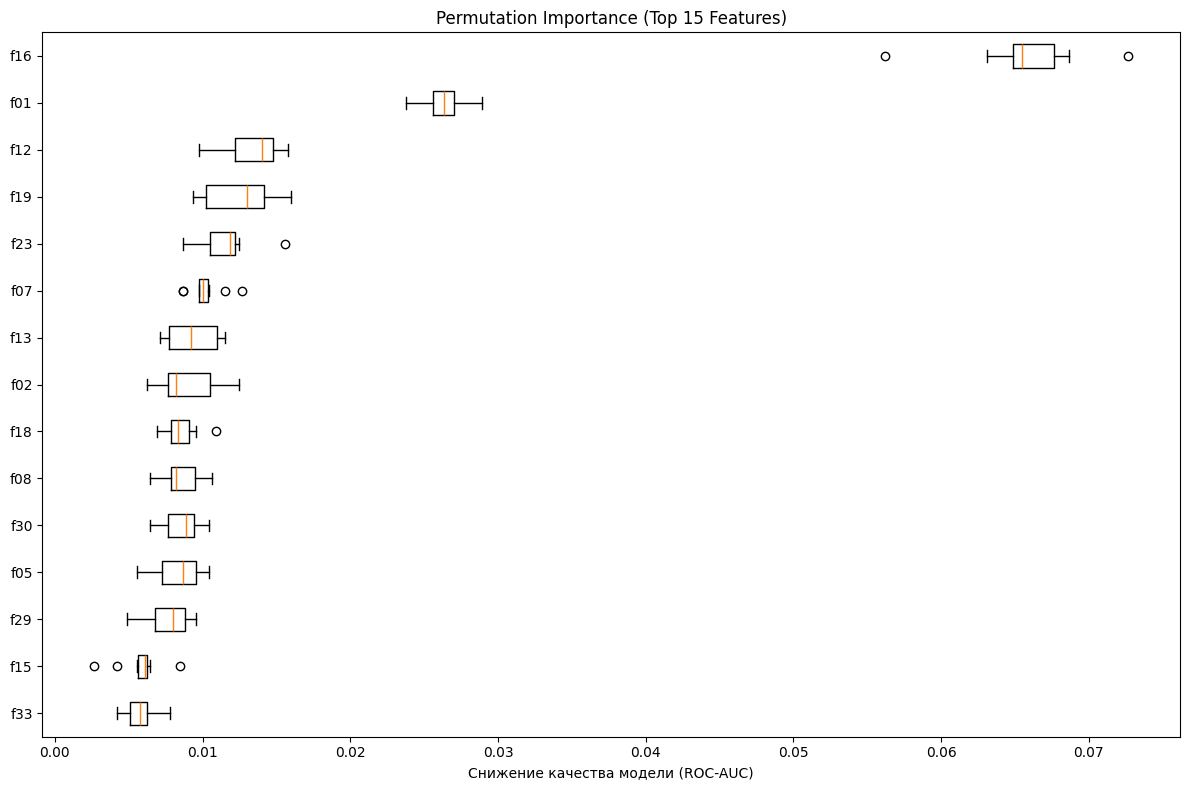


 Признаки вверху графика - самые важные. 'Перемешивание' значений в этих столбцах сильнее всего ухудшает предсказательную силу модели. Это говорит о том, что модель активно использует их для принятия решений.


In [37]:
# ЗАДАНИЕ Финальная оценка качества моделей на тест

print(" Оценка моделей на тестовой выборке ")

#  Decision Tree 
y_pred_dt = best_dt.predict(X_test)
y_proba_dt = best_dt.predict_proba(X_test)[:, 1]
results['DecisionTreeClassifier'] = {'accuracy': accuracy_score(y_test, y_pred_dt), 'f1': f1_score(y_test, y_pred_dt), 'roc_auc': roc_auc_score(y_test, y_proba_dt)}

# Random Forest 
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]
results['RandomForestClassifier'] = {'accuracy': accuracy_score(y_test, y_pred_rf), 'f1': f1_score(y_test, y_pred_rf), 'roc_auc': roc_auc_score(y_test, y_proba_rf)}

#  HistGradientBoosting 
y_pred_hgb = best_hgb.predict(X_test)
y_proba_hgb = best_hgb.predict_proba(X_test)[:, 1]
results['HistGradientBoostingClassifier'] = {'accuracy': accuracy_score(y_test, y_pred_hgb), 'f1': f1_score(y_test, y_pred_hgb), 'roc_auc': roc_auc_score(y_test, y_proba_hgb)}


# Сводная таблица результатов 
results_df = pd.DataFrame(results).T.sort_values(by='roc_auc', ascending=False)
print("\n Финальная таблица метрик на TEST ")
print(results_df)

#  Определение лучшей модели 
best_model_name = results_df.index[0]
if best_model_name == 'HistGradientBoostingClassifier':
    best_model = best_hgb
elif best_model_name == 'RandomForestClassifier':
    best_model = best_rf
else: # DecisionTreeClassifier
    best_model = best_dt
print(f"\nЛучшая модель по ROC-AUC: '{best_model_name}'")

# Диагностические графики для лучшей модели

print("\n Построение диагностических графиков ")

#  График 1: ROC-кривые для всех моделей 
plt.figure(figsize=(10, 8))
model_probas = {
    'LogisticRegression': y_proba_logreg, 'DecisionTree': y_proba_dt,
    'RandomForest': y_proba_rf, 'HistGradientBoosting': y_proba_hgb
}
for name, proba in model_probas.items():
    fpr, tpr, _ = roc_curve(y_test, proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, proba):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Случайное угадывание')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые')
plt.legend()
plt.grid()
plt.savefig(os.path.join(FIGURES_PATH, 'roc_curves.png'))
print("График ROC-кривых сохранен.")
plt.show()

# График 2: Матрица ошибок (Confusion Matrix) для лучшей модели 
cm = confusion_matrix(y_test, best_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Матрица ошибок для {best_model_name}')
plt.savefig(os.path.join(FIGURES_PATH, 'confusion_matrix.png'))
print("Матрица ошибок сохранена.")
plt.show()

# ЗАДАНИЕ 2.3.6: Интерпретация лучшей модели

print("\n Расчет важности признаков (Permutation Importance) ")
perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=RANDOM_STATE, n_jobs=-1)
sorted_idx = perm_importance.importances_mean.argsort()

# График для 15 самых важных признаков
top_n = 15
plt.figure(figsize=(12, 8))
plt.boxplot(
    perm_importance.importances[sorted_idx][-top_n:].T,
    vert=False,
    labels=X_test.columns[sorted_idx][-top_n:]
)
plt.title(f"Permutation Importance (Top {top_n} Features)")
plt.xlabel("Снижение качества модели (ROC-AUC)")
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_PATH, 'permutation_importance.png'))
print("График важности признаков сохранен.")
plt.show()
print("\n Признаки вверху графика - самые важные. 'Перемешивание' значений в этих столбцах сильнее всего ухудшает предсказательную силу модели. Это говорит о том, что модель активно использует их для принятия решений.")



In [38]:
# ЗАДАНИЕ 2.4: Сохранение артефактов эксперимента

print("\n Сохранение всех артефактов ")

# 1. Финальные метрики на test
metrics_path = os.path.join(ARTIFACTS_PATH, "metrics_test.json")
with open(metrics_path, 'w') as f:
    json.dump(results_df.to_dict('index'), f, indent=4)
print(f"1. Финальные метрики сохранены в: {metrics_path}")

# 2. Результаты подбора гиперпараметров
search_path = os.path.join(ARTIFACTS_PATH, "search_summaries.json")
with open(search_path, 'w') as f:
    # Конвертируем np.float64 в обычный float для JSON
    for model_name in search_summaries:
        search_summaries[model_name]['best_score_cv'] = float(search_summaries[model_name]['best_score_cv'])
    json.dump(search_summaries, f, indent=4)
print(f"2. Результаты подбора сохранены в: {search_path}")

# 3. Лучшая модель
model_path = os.path.join(ARTIFACTS_PATH, "best_model.joblib")
joblib.dump(best_model, model_path)
print(f"3. Лучшая модель сохранена в: {model_path}")

# 4. Метаданные лучшей модели
meta_path = os.path.join(ARTIFACTS_PATH, "best_model_meta.json")
best_model_meta = {
    "best_model_name": best_model_name,
    "best_model_params": search_summaries[best_model_name]['best_params'],
    "test_metrics": results_df.loc[best_model_name].to_dict()
}
with open(meta_path, 'w') as f:
    json.dump(best_model_meta, f, indent=4)
print(f"4. Метаданные лучшей модели сохранены в: {meta_path}")



 Сохранение всех артефактов 
1. Финальные метрики сохранены в: C:/Users/1/Desktop/Учеба/2 КУРС/ДПО_Инженерия Искусственного Интеллекта/AI_source/AI_source/homeworks/HW06/artifacts/metrics_test.json
2. Результаты подбора сохранены в: C:/Users/1/Desktop/Учеба/2 КУРС/ДПО_Инженерия Искусственного Интеллекта/AI_source/AI_source/homeworks/HW06/artifacts/search_summaries.json
3. Лучшая модель сохранена в: C:/Users/1/Desktop/Учеба/2 КУРС/ДПО_Инженерия Искусственного Интеллекта/AI_source/AI_source/homeworks/HW06/artifacts/best_model.joblib
4. Метаданные лучшей модели сохранены в: C:/Users/1/Desktop/Учеба/2 КУРС/ДПО_Инженерия Искусственного Интеллекта/AI_source/AI_source/homeworks/HW06/artifacts/best_model_meta.json
